# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
from scipy.stats import mode
import datetime
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (10,7)

# Loading the Dataset

In [3]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [4]:
train['source'] = 'train'
test['source'] = 'test'

# combining the test and train datasets
data = pd.concat([train, test], ignore_index=True)


# Understanding the dataset

In [5]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,source
0,52664,a,3942.0,2.0,155623,7855.0,42.0,train
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,train
2,468453,c,1358.0,4.0,56177,8067.0,60.0,train
3,96996,a,264.0,3.0,168793,27064.0,9.0,train
4,131465,c,4271.0,4.0,112223,13986.0,83.0,train


In [6]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views,source
0,366953,a,5645.0,3.0,50652,33200.0,test
1,71864,c,24511.0,6.0,37685,2730.0,test
2,141692,i,927.0,1.0,135293,21167.0,test
3,316833,i,21.0,6.0,166998,18528.0,test
4,440445,i,4475.0,10.0,53504,57240.0,test


In [7]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,source
0,52664,a,3942.0,2.0,155623,7855.0,42.0,train
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,train
2,468453,c,1358.0,4.0,56177,8067.0,60.0,train
3,96996,a,264.0,3.0,168793,27064.0,9.0,train
4,131465,c,4271.0,4.0,112223,13986.0,83.0,train


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
 7   source      330045 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 20.1+ MB


In [9]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


# Exploratory Data Analysis

Text(0.5, 1, 'Fig:0.1 Correlation Plot')

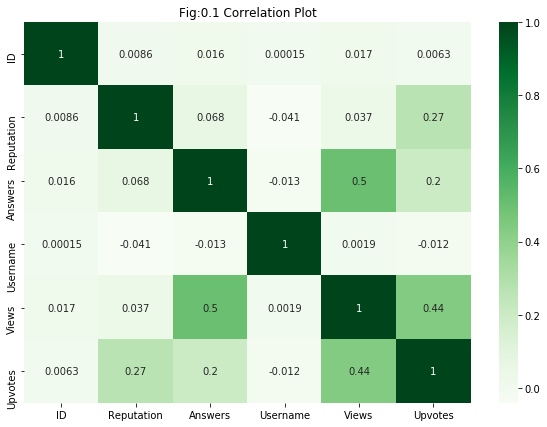

In [10]:
#correlation plot
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.title("Fig:0.1 Correlation Plot")

Text(0.5, 1.0, 'Fig:1.1 Distribution Plot of Reputation')

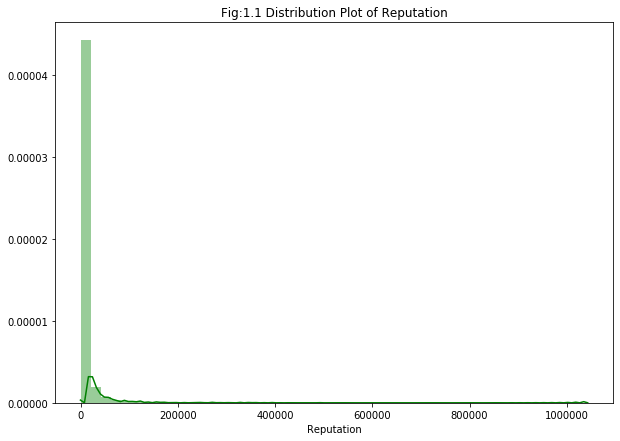

In [11]:
#finding the distribution of reputation values
sns.distplot(train['Reputation'],color='green')
plt.title("Fig:1.1 Distribution Plot of Reputation")

Text(0.5, 1.0, 'Fig:1.2 Distribution Plot of Answers')

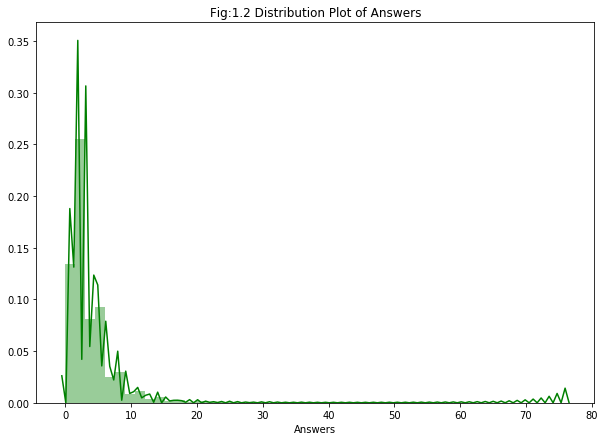

In [12]:
#finding the distribution of number of answers
sns.distplot(train['Answers'],color='green')
plt.title("Fig:1.2 Distribution Plot of Answers")

Text(0.5, 1.0, 'Fig:1.3 Distribution Plot of Views')

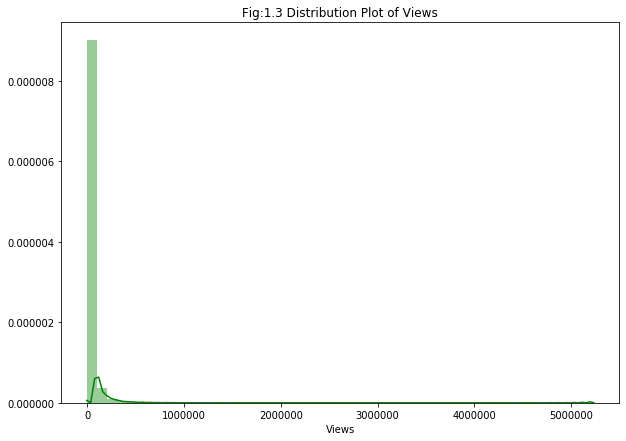

In [13]:
#finding the distribution of number of views
sns.distplot(train['Views'],color='green')
plt.title("Fig:1.3 Distribution Plot of Views")

In [14]:
pd.options.display.float_format = "{:,.2f}".format

In [15]:
#number of unique values in each of the columns
for i in train.columns:
    print(i,train[i].nunique())

ID 330045
Tag 10
Reputation 16527
Answers 63
Username 141802
Views 82137
Upvotes 7239
source 1


Username
4118     797
17878    608
45704    483
23223    413
6697     408
62142    408
94185    391
59362    355
61217    337
41953    328
dtype: int64

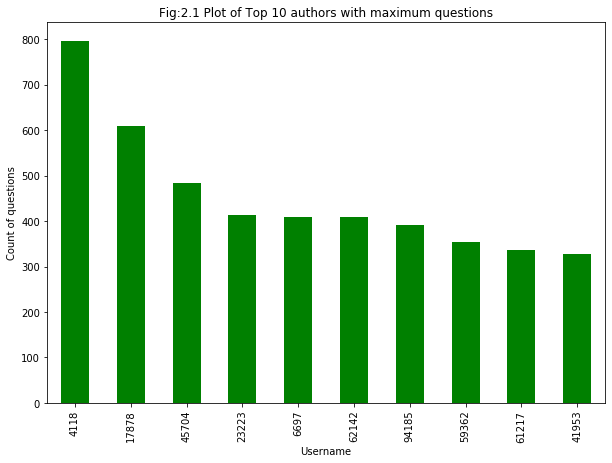

In [16]:
#plotting the top 10 authors with max questions
user_size=train.groupby('Username').size().nlargest(10,)
user_size.plot(kind='bar',color='green')
plt.title("Fig:2.1 Plot of Top 10 authors with maximum questions")
plt.ylabel("Count of questions")
user_size

In [17]:
#top users and their contribution to total upvotes
def user_tab(end_range,count):
    username_table=pd.DataFrame(columns=['Top Users','Contribution to upvotes(%)'])
    for i in range(0,end_range,count):
        username_group=train.groupby('Username').sum()
        username_graph=username_group.nlargest(i,['Upvotes'])
        num=username_graph['Upvotes'].sum()
        tot=train['Upvotes'].sum()
        acc=(num/tot)*100
        username_table=username_table.append({'Top Users':i,'Contribution to upvotes(%)':acc},ignore_index=True)
    return username_table


In [18]:
user_tab(500,25)

,Top Users,Contribution to upvotes(%)
0,0.00,0.00
1,25.00,16.26
2,50.00,23.47
3,75.00,27.60
4,100.00,30.79
5,125.00,33.45
6,150.00,35.74
7,175.00,37.80
8,200.00,39.63
9,225.00,41.28


In [19]:
user_tab(25000,2000)

,Top Users,Contribution to upvotes(%)
0,0.00,0.00
1,"2,000.00",73.94
2,"4,000.00",82.39
3,"6,000.00",86.60
4,"8,000.00",89.21
5,"10,000.00",91.00
6,"12,000.00",92.31
7,"14,000.00",93.33
8,"16,000.00",94.14
9,"18,000.00",94.80


In [20]:
user_tab(90000,10000)

,Top Users,Contribution to upvotes(%)
0,0.00,0.00
1,"10,000.00",91.00
2,"20,000.00",95.36
3,"30,000.00",97.16
4,"40,000.00",98.14
5,"50,000.00",98.75
6,"60,000.00",99.15
7,"70,000.00",99.43
8,"80,000.00",99.62


Text(0, 0.5, 'Average Upvotes per Question')

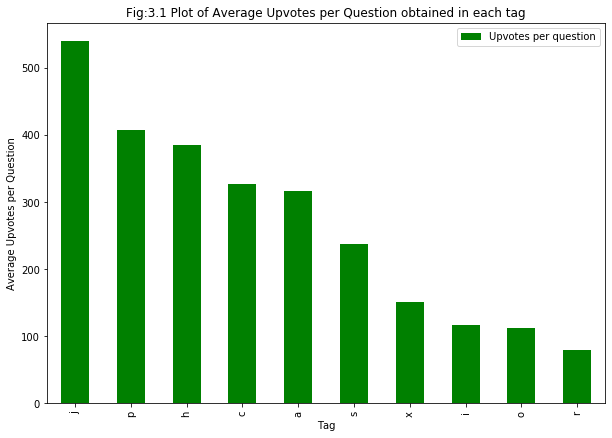

In [21]:
# table containing values of average upvotes per question obtained in each tag
tag_group=train.groupby('Tag')
tag_upvote_sum=tag_group['Upvotes'].sum()
tag_count=tag_group.size()
tot_upvote_per_question=tag_upvote_sum/tag_count
tot_upvote_per_question
tag_table=pd.DataFrame(tot_upvote_per_question)
tag_table=tag_table.rename(columns={0: 'Upvotes per question'}).sort_values('Upvotes per question',ascending=False)
tag_table.plot(kind='bar',color='green')
plt.title("Fig:3.1 Plot of Average Upvotes per Question obtained in each tag")
plt.ylabel("Average Upvotes per Question")

In [22]:
tag_table['T.upvotes']=tag_upvote_sum
tag_table['T.reputation']=tag_group['Reputation'].sum()
tag_table['T.answers']=tag_group['Answers'].sum()
tag_table['T.views']=tag_group['Views'].sum()
tag_table['T.questions']=tag_count

tag_table['% upvotes']=(tag_table['T.upvotes']/tag_table['T.upvotes'].sum())*100
tag_table['% reputation']=(tag_table['T.reputation']/tag_table['T.reputation'].sum())*100
tag_table['% answers']=(tag_table['T.answers']/tag_table['T.answers'].sum())*100
tag_table['% views']=(tag_table['T.views']/tag_table['T.views'].sum())*100
tag_table['% questions']=(tag_table['T.questions']/tag_table['T.questions'].sum())*100

In [23]:
top_upvotes=train.nlargest(1000,['Upvotes'])
top_users=top_upvotes.groupby('Tag')
top_questions_count=top_users['Username'].size()
tag_table['Top questions count']=top_questions_count
tag_table['% top questions']=(tag_table['Top questions count']/tag_table['Top questions count'].sum())*100

In [24]:
tag_table.drop(['Top questions count','T.questions','T.views','T.answers','T.reputation','T.upvotes'],axis=1,inplace=True)

In [25]:
tag_table.sort_values("% upvotes",ascending=False)

,Upvotes per question,% upvotes,% reputation,% answers,% views,% questions,% top questions
Tag,,,,,,,
j,540.36,35.04,23.33,24.29,31.96,21.89,37.10
c,327.57,21.31,29.84,22.68,19.81,21.95,17.50
p,407.35,15.87,13.64,13.35,14.72,13.15,19.70
a,316.46,9.00,7.49,10.44,10.30,9.60,9.30
h,384.72,7.10,5.60,6.01,7.14,6.23,7.90
s,237.03,4.96,5.95,6.50,6.15,7.07,5.40
i,117.39,3.41,6.62,9.22,5.23,9.82,1.50
o,112.16,1.46,3.21,3.80,2.01,4.41,0.50
x,151.26,0.95,1.76,1.49,1.15,2.11,0.80


Text(0.5, 1.0, 'Fig:3.2 Plot of Percentage of upvotes obtained under each tag')

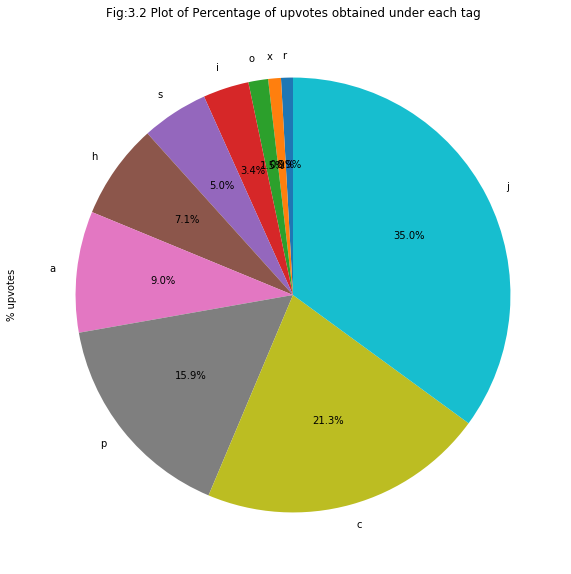

In [26]:
plt.rcParams["figure.figsize"] = (12,10)
tag_table['% upvotes'].sort_values(ascending=True).plot.pie(subplots=True,autopct='%1.1f%%',
         startangle=90)
plt.title("Fig:3.2 Plot of Percentage of upvotes obtained under each tag")

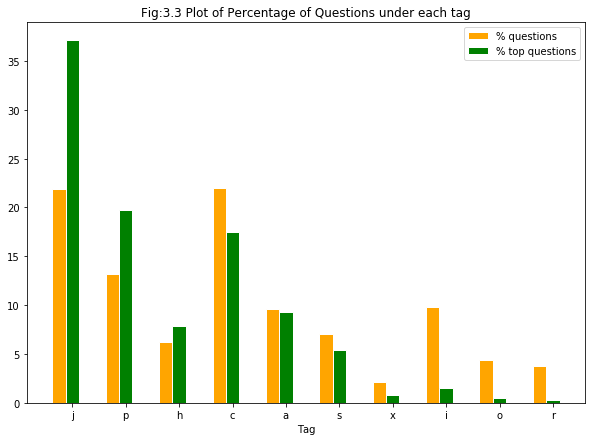

In [27]:
plt.rcParams["figure.figsize"] = (10,7)
barWidth = 0.25
# Set position of bar on X axis
r1 = np.arange(len(tag_table['% questions']))
r2 = [x + barWidth for x in r1]
 
# Make the plot

plt.bar(r1, tag_table['% questions'], color='orange', width=barWidth, edgecolor='white', label='% questions')
plt.bar(r2, tag_table['% top questions'], color='green', width=barWidth, edgecolor='white', label='% top questions')
# Add xticks on the middle of the group bars
plt.xlabel('Tag')
plt.xticks([r + barWidth for r in range(len(tag_table['% questions']))], ['j', 'p', 'h', 'c', 'a','s','x','i','o','r'])
 

# Create legend & Show graphic
plt.legend()
plt.title("Fig:3.3 Plot of Percentage of Questions under each tag")
plt.show()



# Data Preprocessing-Categorical Data Encoding and Feature Scaling

In [28]:
# encoding categorical data
data = pd.get_dummies(data, columns=['Tag'])
data.head()

,ID,Reputation,Answers,Username,Views,Upvotes,source,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,52664,"3,942.00",2.00,155623,"7,855.00",42.00,train,1,0,0,0,0,0,0,0,0,0
1,327662,"26,046.00",12.00,21781,"55,801.00","1,175.00",train,1,0,0,0,0,0,0,0,0,0
2,468453,"1,358.00",4.00,56177,"8,067.00",60.00,train,0,1,0,0,0,0,0,0,0,0
3,96996,264.00,3.00,168793,"27,064.00",9.00,train,1,0,0,0,0,0,0,0,0,0
4,131465,"4,271.00",4.00,112223,"13,986.00",83.00,train,0,1,0,0,0,0,0,0,0,0


In [29]:
num_features=['Reputation', 'Answers', 'Views']
# Getting polynomial features and selecting only newly created features
poly=PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)
poly_data=pd.DataFrame(poly.fit_transform(data[num_features])).loc[:,len(num_features):]
data=data.join(poly_data)
data.head()

,ID,Reputation,Answers,Username,Views,Upvotes,source,Tag_a,Tag_c,Tag_h,...,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,3,4,5,6
0,52664,"3,942.00",2.00,155623,"7,855.00",42.00,train,1,0,0,...,0,0,0,0,0,0,"7,884.00","30,964,410.00","15,710.00","61,928,820.00"
1,327662,"26,046.00",12.00,21781,"55,801.00","1,175.00",train,1,0,0,...,0,0,0,0,0,0,"312,552.00","1,453,392,846.00","669,612.00","17,440,714,152.00"
2,468453,"1,358.00",4.00,56177,"8,067.00",60.00,train,0,1,0,...,0,0,0,0,0,0,"5,432.00","10,954,986.00","32,268.00","43,819,944.00"
3,96996,264.00,3.00,168793,"27,064.00",9.00,train,1,0,0,...,0,0,0,0,0,0,792.00,"7,144,896.00","81,192.00","21,434,688.00"
4,131465,"4,271.00",4.00,112223,"13,986.00",83.00,train,0,1,0,...,0,0,0,0,0,0,"17,084.00","59,734,206.00","55,944.00","238,936,824.00"


In [30]:
data.drop(['Reputation', 'Answers', 'Views','Tag_i','Tag_o','Tag_r','Tag_x','Tag_s'],axis=1,inplace=True)

In [31]:
#renaming columns
data= data.rename(columns={3: 'Reputation_Answers',4:'Reputation_Views',5:'Answers_Views',6:'Reputation_Answers_Views'})
data.head()

,ID,Username,Upvotes,source,Tag_a,Tag_c,Tag_h,Tag_j,Tag_p,Reputation_Answers,Reputation_Views,Answers_Views,Reputation_Answers_Views
0,52664,155623,42.00,train,1,0,0,0,0,"7,884.00","30,964,410.00","15,710.00","61,928,820.00"
1,327662,21781,"1,175.00",train,1,0,0,0,0,"312,552.00","1,453,392,846.00","669,612.00","17,440,714,152.00"
2,468453,56177,60.00,train,0,1,0,0,0,"5,432.00","10,954,986.00","32,268.00","43,819,944.00"
3,96996,168793,9.00,train,1,0,0,0,0,792.00,"7,144,896.00","81,192.00","21,434,688.00"
4,131465,112223,83.00,train,0,1,0,0,0,"17,084.00","59,734,206.00","55,944.00","238,936,824.00"


In [32]:
data.drop(['Reputation_Answers_Views','Username','Reputation_Answers'],axis=1,inplace=True)

In [33]:
warnings.filterwarnings('ignore')

# Divide into test and train datasets
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# Drop unnecessary columns
train.drop(['source','ID'],axis=1,inplace=True)
test.drop(['Upvotes','source'],axis=1,inplace=True)
trainX = train.drop(['Upvotes'], axis=1)

trainY = train.Upvotes

In [34]:
# creating a dataframe consisting of column names
xcol_names=list(trainX.columns)
xcol_names=pd.DataFrame(xcol_names,columns=['Independent Variables'])
xcol_names

,Independent Variables
0,Tag_a
1,Tag_c
2,Tag_h
3,Tag_j
4,Tag_p
5,Reputation_Views
6,Answers_Views


In [35]:
# normalizing the variables
trainY = trainY.values.reshape(len(trainY),1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(trainX)
y = sc_y.fit_transform(trainY)


In [36]:
# creating dataframes of x and y datasets
X=pd.DataFrame(data=X)
y=pd.DataFrame(data=y)
X.head()


,0,1,2,3,4,5,6
0,3.07,-0.53,-0.26,-0.53,-0.39,-0.08,-0.13
1,3.07,-0.53,-0.26,-0.53,-0.39,0.33,0.22
2,-0.33,1.89,-0.26,-0.53,-0.39,-0.09,-0.12
3,3.07,-0.53,-0.26,-0.53,-0.39,-0.09,-0.10
4,-0.33,1.89,-0.26,-0.53,-0.39,-0.07,-0.11


# Model Building

In [37]:
# splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

In [39]:
# linear regression model
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([[-0.09129278],
       [-0.09120195],
       [-0.08795795],
       ...,
       [ 0.02096249],
       [-0.08408258],
       [-0.04819839]])

In [40]:
# coefficients of linear regression model
reg.coef_

array([[1.45384875e-03, 1.97292655e-03, 8.72979688e-04, 2.44010481e-03,
        1.12859005e-03, 9.37120494e-01, 3.27733333e-02]])

In [41]:
# creating a dataframe of linear regression model coefficients
coef_lin=pd.DataFrame(data=reg.coef_)
coef_lin=coef_lin.values.reshape(7,1)

In [42]:
# intercept of linear regression model
reg.intercept_

array([0.00022035])

In [43]:
# computing rmse and r square values linear regression model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)*100
print(rmse,r2)        

0.20792882786008243 93.06988642818217


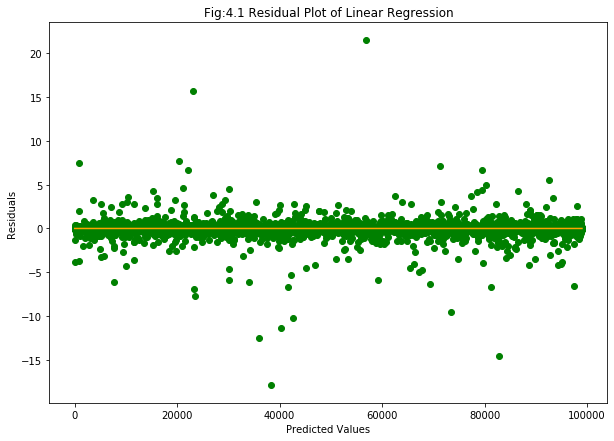

In [44]:
# residual plot linear regression model
y_pred=y_pred.reshape(99014 ,1)
x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x,(y_pred-y_test),c='green')
plt.plot(x,[0]*len(y_pred),c='orange')
plt.title("Fig:4.1 Residual Plot of Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [45]:
# ridge regression model
ridgereg=Ridge(alpha=50)
ridgereg.fit(x_train,y_train)
pred1=ridgereg.predict(x_test)

In [46]:
# coefficients of ridge regression model
ridgereg.coef_

array([[1.45313065e-03, 1.97418832e-03, 8.73791867e-04, 2.44206850e-03,
        1.13030174e-03, 9.36899334e-01, 3.28760391e-02]])

In [47]:
# creating a dataframe of ridge regression model coefficients
coef_ridge=pd.DataFrame(data=ridgereg.coef_)
coef_ridge=coef_ridge.values.reshape(7,1)

In [48]:
# intercept of ridge regression model
ridgereg.intercept_

array([0.00022075])

In [49]:
# computing rmse and r square values of ridge regression model
rmse_1=np.sqrt(mean_squared_error(y_test,pred1))
r2_1=r2_score(y_test,pred1)*100
print(rmse,r2)

0.20792882786008243 93.06988642818217


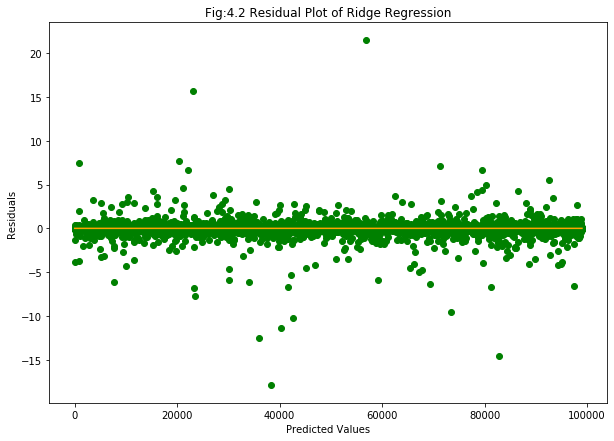

In [50]:
# residual plot f ridge regression model
x1=[i for i in range(1,len(pred1)+1)]
x1_plot = plt.scatter(x1,(pred1-y_test),c='green')
plt.plot(x1,[0]*len(pred1),c='orange')
plt.title("Fig:4.2 Residual Plot of Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [51]:
# lasso regression
lassoreg=Lasso(alpha=0.01,normalize=False)
lassoreg.fit(x_train,y_train)
pred2=lassoreg.predict(x_test)
pred2

array([-0.08634694, -0.08627707, -0.08636227, ...,  0.01987799,
       -0.07918369, -0.04692982])

In [52]:
# coefficients of lasso regression model
lassoreg.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.93156334, 0.02580882])

In [53]:
# creating a dataframe of lasso regression model coefficients
coef_lasso=pd.DataFrame(data=lassoreg.coef_)
coef_lasso=coef_lasso.values.reshape(7,1)
coef_lasso

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.93156334],
       [0.02580882]])

In [54]:
# intercept of lasso regression model
lassoreg.intercept_

array([0.00023325])

In [55]:
# computing rmse and r square values of lasso regression model
rmse_2=np.sqrt(mean_squared_error(y_test,pred2))
r2_2=r2_score(y_test,pred2)*100
print(rmse_2,r2_2)

0.20753941323126152 93.09581992230234


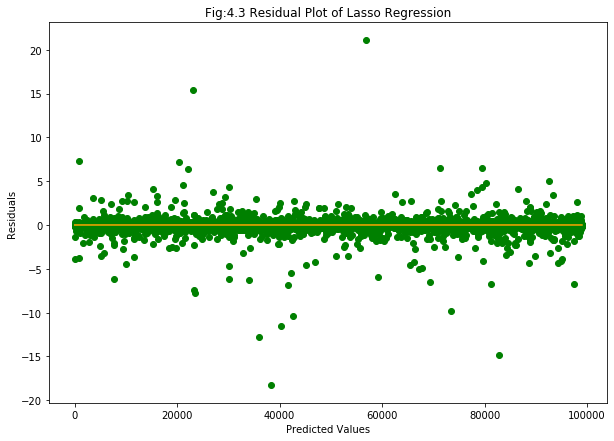

In [56]:
# residual plot of lasso regression model
pred2=pred2.reshape(len(pred2),1)
x2=[i for i in range(1,len(pred2)+1)]
x2_plot = plt.scatter(x2,(pred2-y_test),c='g')
plt.plot(x2,[0]*len(pred2),c='orange')
plt.title("Fig:4.3 Residual Plot of Lasso Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [57]:
#K Nearest Regressor
neigh = KNeighborsRegressor(n_neighbors=18)
neigh.fit(x_train,y_train)
pred3=neigh.predict(x_test)
pred3
# computing rmse and r square values of k nearest regression model
rmse_3=np.sqrt(mean_squared_error(y_test,pred3))
r2_3=r2_score(y_test,pred3)*100
print(rmse_3,r2_3)

0.24016260504416553 90.75468500125419


In [58]:
#Decision Tree Regressor
dt = DecisionTreeRegressor(criterion='mse',random_state=0,max_depth=5,min_samples_split=3,min_samples_leaf=6,
                           min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=15)
dt.fit(x_train, y_train)

pred4=dt.predict(x_test)
pred4
# computing rmse and r square values of decision tree regression model
rmse_4=np.sqrt(mean_squared_error(y_test,pred4))
r2_4=r2_score(y_test,pred4)*100
print(rmse_4,r2_4)

0.3248167276135222 83.0882825287581


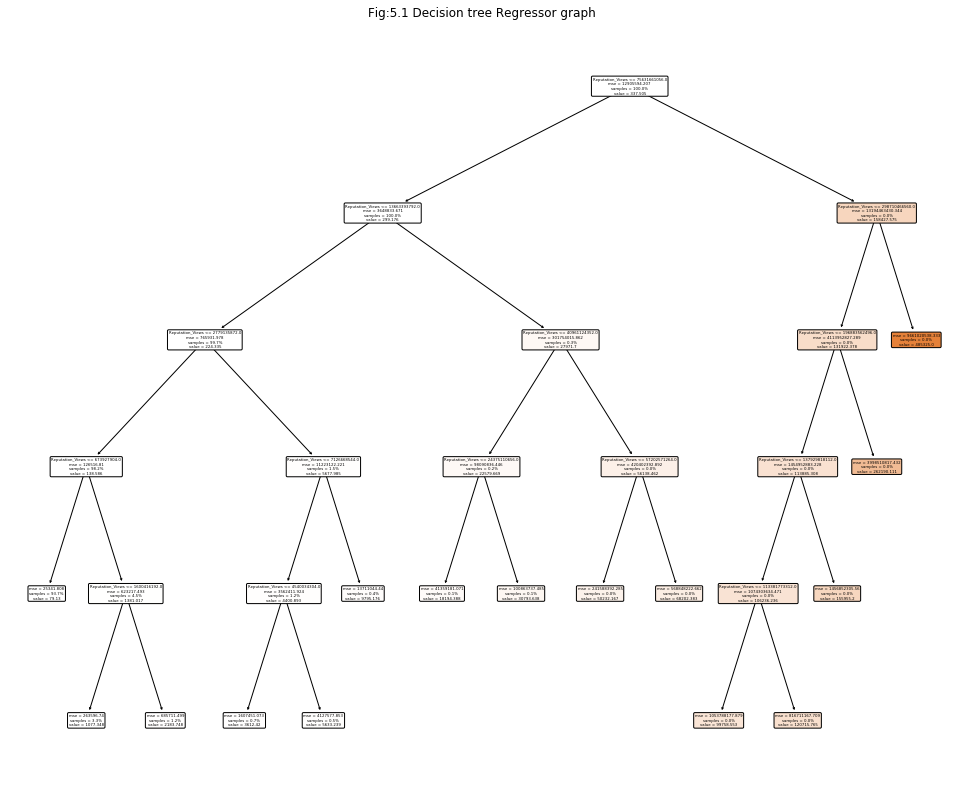

In [59]:
# plotting decision regressor tree
cols=list(trainX.columns.values)
plt.rcParams["figure.figsize"] = (17,14)
tree.plot_tree(dt.fit(trainX,trainY),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,)
plt.title("Fig:5.1 Decision tree Regressor graph")
plt.show()

In [60]:
# Gradient Boosting Regressor
gra_reg =  GradientBoostingRegressor(n_estimators=20,criterion='mse',random_state=1)
gra_reg.fit(x_train, y_train)
pred5 = gra_reg.predict(x_test)
# computing rmse and r square values of Gradient Boosting regression model
rmse_5=np.sqrt(mean_squared_error(y_test,pred5))
r2_5=r2_score(y_test,pred5)*100
print(rmse_5,r2_5)

0.29078475112706687 86.4464145667577


# Feature Importance

In [61]:
# creating a dataframe consisting of rmse and r square values
metrics_df=pd.DataFrame(columns=['metrics','Linear reg','Ridge reg','Lasso reg','K Nearest reg','Decision Tree reg','Gradient boositng reg'])
metrics_df=metrics_df.append({'metrics':"RMSE ", 'Linear reg':rmse, 'Ridge reg':rmse_1, 'Lasso reg':rmse_2,'K Nearest reg':rmse_3,'Decision Tree reg':rmse_4,'Gradient boositng reg':rmse_5}, ignore_index=True)
metrics_df=metrics_df.append({'metrics': "R-SQUARE ", 'Linear reg':r2, 'Ridge reg':r2_1, 'Lasso reg':r2_2,'K Nearest reg':r2_3,'Decision Tree reg':r2_4,'Gradient boositng reg':r2_5}, ignore_index=True)
metrics_df

,metrics,Linear reg,Ridge reg,Lasso reg,K Nearest reg,Decision Tree reg,Gradient boositng reg
0,RMSE,0.21,0.21,0.21,0.24,0.32,0.29
1,R-SQUARE,93.07,93.07,93.10,90.75,83.09,86.45


In [62]:
# creating a dataframe to display the feature's importance
feature_df=pd.DataFrame(columns=['Linear reg','Ridge reg','Lasso reg'])
for i in range(7):
    feature_df=feature_df.append({'Linear reg':coef_lin[i], 'Ridge reg':coef_ridge[i], 'Lasso reg':coef_lasso[i]}, ignore_index=True)

data_join=feature_df.join(xcol_names, lsuffix="_left", rsuffix="_right").sort_values('Lasso reg', axis=0, ascending=False)
data_join

,Linear reg,Ridge reg,Lasso reg,Independent Variables
5,[0.9371204943837568],[0.9368993337104093],[0.9315633376476539],Reputation_Views
6,[0.03277333331590616],[0.03287603914192135],[0.02580881936901728],Answers_Views
0,[0.0014538487532552032],[0.001453130650572904],[0.0],Tag_a
1,[0.0019729265519431265],[0.0019741883202302303],[0.0],Tag_c
2,[0.0008729796875749335],[0.0008737918667821021],[0.0],Tag_h
3,[0.0024401048068484416],[0.002442068503523971],[0.0],Tag_j
4,[0.0011285900506202316],[0.0011303017428781793],[0.0],Tag_p


In [63]:
plt.rcParams["figure.figsize"] = (8,6)

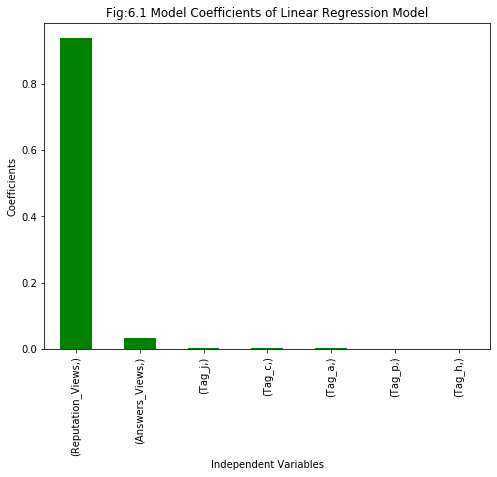

In [64]:
# plotting model coefficients of linear regression model
coef_graph =pd.Series(coef_lin.ravel(), xcol_names).sort_values(ascending=False)
coef_graph.plot(kind='bar', title='Fig:6.1 Model Coefficients of Linear Regression Model',color='green')
plt.xlabel("Independent Variables")
plt.ylabel("Coefficients")
plt.show()

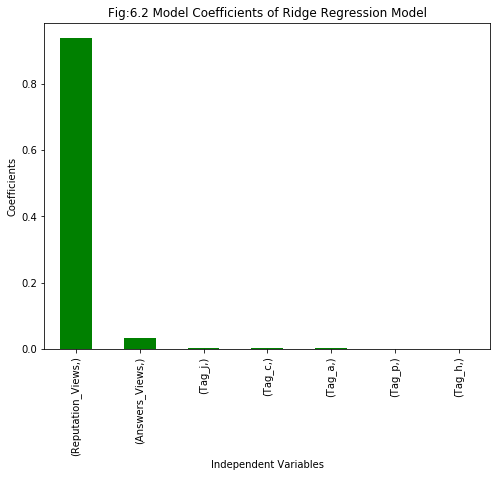

In [65]:
# plotting model coefficients of ridge regression model
coef_graph1 =pd.Series(coef_ridge.ravel(), xcol_names).sort_values(ascending=False)
coef_graph1.plot(kind='bar', title='Fig:6.2 Model Coefficients of Ridge Regression Model',color='green')
plt.xlabel("Independent Variables")
plt.ylabel("Coefficients")
plt.show()

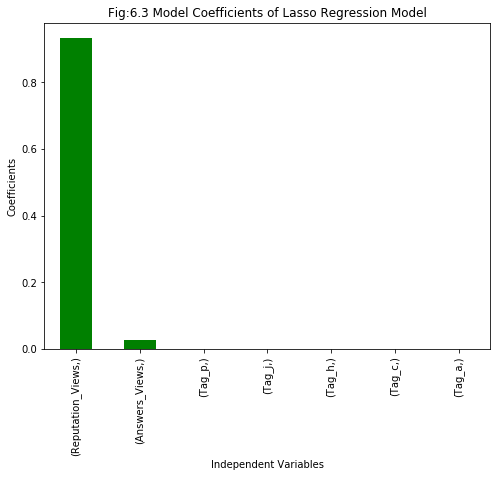

In [66]:
# plotting model coefficients of lasso regression model
coef_graph2 =pd.Series(coef_lasso.ravel(), xcol_names).sort_values(ascending=False)
coef_graph2.plot(kind='bar', title='Fig:6.3 Model Coefficients of Lasso Regression Model',color='green')
plt.xlabel("Independent Variables")
plt.ylabel("Coefficients")
plt.show()

# Predicting Test Data

In [67]:
# fitting the best model on test 
test1 = pd.DataFrame(test)
test_data = test1.drop(['ID'], axis=1)
test_ID=test1.ID
testX = sc_X.fit_transform(test_data)
Test=pd.DataFrame(data=testX)
Test.head()
pred_test=((sc_y.inverse_transform(lassoreg.predict((np.array(Test))))))
print(pred_test.reshape(len(pred_test),1))

[[202.45620417]
 [ 83.7538304 ]
 [ 38.83746167]
 ...
 [ 55.58219464]
 [ 22.24520646]
 [ 28.21543556]]


In [68]:
test_ID = pd.DataFrame(test_ID)
test_ID.reset_index(inplace=True)

test_df = pd.DataFrame(pred_test)
test_df= test_df.rename(columns={0: 'Upvotes'})
test_df_join=pd.DataFrame({"ID":test_ID.ID,"Upvotes":test_df.Upvotes})
test_df_join.to_csv('upvotes1.csv',index=False)